# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df=pd.read_csv("../data/checker_submits.csv", parse_dates=['timestamp'])
df['hour']=df['timestamp'].dt.hour
df['dayofweek']=df['timestamp'].dt.day_of_week
df

,uid,labname,numTrials,timestamp,hour,dayofweek
0,user_4,project1,1,2020-04-17 05:19:02.744528,5,4
1,user_4,project1,2,2020-04-17 05:22:45.549397,5,4
2,user_4,project1,3,2020-04-17 05:34:24.422370,5,4
3,user_4,project1,4,2020-04-17 05:43:27.773992,5,4
4,user_4,project1,5,2020-04-17 05:46:32.275104,5,4
...,...,...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966,20,3
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900,20,3
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761,20,3
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806,20,3


In [3]:
encoder = OneHotEncoder(sparse_output=False)

In [4]:
transform_data=encoder.fit_transform(df[['uid','labname']])
transform_data

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]], shape=(1686, 41))

In [5]:
transform_cols=encoder.get_feature_names_out(['uid','labname'])
transform_cols

array(['uid_user_0', 'uid_user_1', 'uid_user_10', 'uid_user_11',
       'uid_user_12', 'uid_user_13', 'uid_user_14', 'uid_user_15',
       'uid_user_16', 'uid_user_17', 'uid_user_18', 'uid_user_19',
       'uid_user_2', 'uid_user_20', 'uid_user_21', 'uid_user_22',
       'uid_user_23', 'uid_user_24', 'uid_user_25', 'uid_user_26',
       'uid_user_27', 'uid_user_28', 'uid_user_29', 'uid_user_3',
       'uid_user_30', 'uid_user_31', 'uid_user_4', 'uid_user_6',
       'uid_user_7', 'uid_user_8', 'labname_code_rvw', 'labname_lab02',
       'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05',
       'labname_laba06', 'labname_laba06s', 'labname_project1'],
      dtype=object)

In [6]:
transform_df=pd.DataFrame(transform_data, columns=transform_cols)
transform_df=pd.concat([df,transform_df],axis=1)
transform_df=transform_df.drop(columns=['uid','labname','timestamp'])
transform_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
scaler = StandardScaler()

In [8]:
transform_df['numTrials']=scaler.fit_transform(pd.DataFrame(transform_df['numTrials']))
transform_df['hour']=scaler.fit_transform(pd.DataFrame(transform_df['hour']))
transform_df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
transform_df.to_csv('../data/dayofweek.csv',index=False)

In [10]:
f"Native accuracy: {float(transform_df.groupby('dayofweek').size().max()/len(transform_df['dayofweek']))}"

'Native accuracy: 0.23487544483985764'

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [11]:
X=transform_df.drop(['dayofweek'],axis=1)
y=transform_df['dayofweek']

In [12]:
model_logreg=LogisticRegression(random_state=21, fit_intercept=False)

In [13]:
model_logreg.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
pred_y=model_logreg.predict(X)

In [15]:
f"Accuracy: {metrics.accuracy_score(pred_y,y)}"

'Accuracy: 0.6405693950177936'

In [16]:
coef=np.sum(np.abs(model_logreg.coef_),axis=0)
coef

array([4.0248825 , 1.28825361, 1.77570923, 6.53171623, 6.12888892,
       4.22287172, 5.09568432, 6.23425914, 9.75518165, 3.68229969,
       5.67675292, 6.68533154, 5.45819233, 5.19275083, 7.88962976,
       4.81492288, 6.11715017, 3.63046318, 3.2367726 , 6.60126164,
       4.40897379, 7.08483286, 6.3351498 , 4.63023575, 5.9413659 ,
       7.56702257, 2.73642019, 5.80300084, 6.95317596, 2.70992573,
       2.54243098, 5.93420875, 8.05153572, 1.77570923, 1.11809977,
       1.12031633, 5.2726618 , 4.09328136, 4.31614867, 7.49637558,
       7.80979574, 8.85557751, 4.79512037])

In [17]:
top_ind_col=np.argsort(coef)[::-1][:10]
top_ind_col

array([ 8, 41, 32, 14, 40, 25, 39, 21, 28, 11])

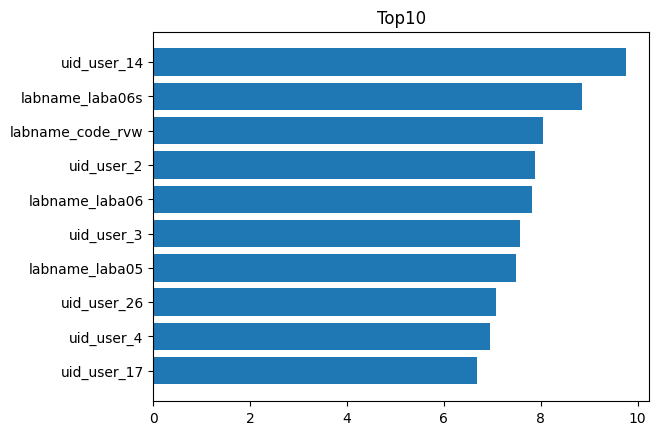

In [18]:
def show_barh(inds,coefs):
	plt.barh(y=[X.columns[i] for i in inds], width=[coefs[i] for i in inds])
	plt.title('Top10')
	plt.gca().invert_yaxis()
	plt.show()

show_barh(top_ind_col,coef)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [19]:
model_svm = SVC(kernel='linear', probability=True, random_state=21)
model_svm.fit(X,y)
pred_y = model_svm.predict(X)
f"Accuracy: {metrics.accuracy_score(pred_y,y)}"

'Accuracy: 0.702846975088968'

In [20]:
for kernel_ in ('linear', 'poly', 'rbf', 'sigmoid'):
	t_model_svm = SVC(kernel=kernel_, probability=True, random_state=21)
	t_model_svm.fit(X,y)
	t_pred_y = t_model_svm.predict(X)
	print(f"Kernel: {kernel_} | Accuracy: {metrics.accuracy_score(t_pred_y,y)}")

Kernel: linear | Accuracy: 0.702846975088968
Kernel: poly | Accuracy: 0.8594306049822064
Kernel: rbf | Accuracy: 0.8558718861209964
Kernel: sigmoid | Accuracy: 0.3997627520759193


In [21]:
coef = np.sum(np.abs(model_svm.coef_),axis=0)
coef

array([16.55899878,  5.47340036,  2.88968249, 10.39858568, 17.88702083,
        8.69359433, 10.05318861,  8.64008484, 21.05562727,  5.80784191,
       10.99191282, 18.18177992,  9.20655077, 15.25226219, 18.20010247,
       11.33115512, 18.36519696, 10.10292542,  5.5705309 , 12.32619543,
       18.77729508, 15.63987941,  5.48848516, 13.86672528, 22.0865577 ,
       22.38527334,  8.8254209 , 15.5949587 , 26.07436324,  6.88012721,
        1.9443654 ,  6.65246918, 15.52159651,  2.88968249,  2.62401008,
        2.39590877, 13.6279503 , 12.40489326,  9.92323753, 37.15024087,
       16.07352031, 23.44009427, 15.41779573])

In [22]:
top_ind_col=np.argsort(coef)[::-1][:10]
top_ind_col

array([39, 28, 41, 25, 24,  8, 20, 16, 14, 11])

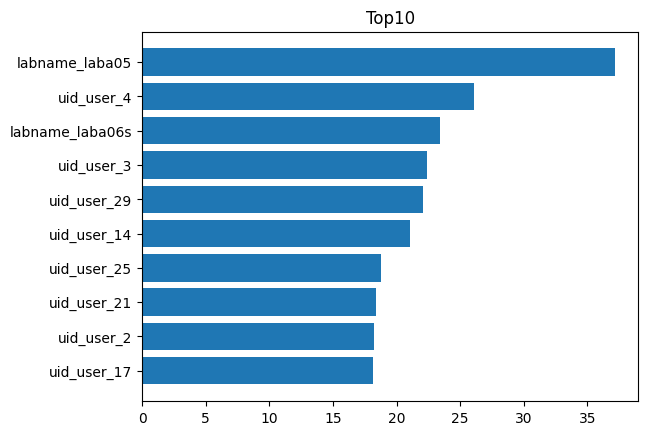

In [23]:
show_barh(top_ind_col,coef)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [24]:
model_tree = DecisionTreeClassifier(max_depth=4, random_state=21)
model_tree.fit(X,y)
pred_y=model_tree.predict(X)
f"Accuracy: {metrics.accuracy_score(pred_y,y)}"

'Accuracy: 0.5516014234875445'

In [25]:
coef=model_tree.feature_importances_
coef

array([0.14931603, 0.06154574, 0.        , 0.        , 0.        ,
       0.        , 0.09837711, 0.        , 0.06455791, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07642063,
       0.        , 0.        , 0.        , 0.        , 0.01610628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06154768, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05479407, 0.        , 0.08646791,
       0.        , 0.05629871, 0.27456793])

In [26]:
top_ind_col=np.argsort(coef)[::-1][:10]
top_ind_col

array([42,  0,  6, 39, 14,  8, 25,  1, 41, 37])

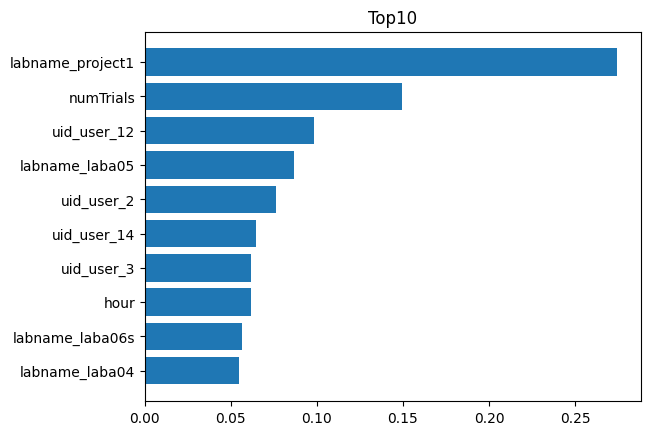

In [27]:
show_barh(top_ind_col,coef)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [28]:
model_forest = RandomForestClassifier(n_estimators=100,max_depth=25,random_state=21)
model_forest.fit(X,y)
pred_y=model_forest.predict(X)
f"Accuracy: {metrics.accuracy_score(pred_y,y)}"

'Accuracy: 1.0'

In [29]:
for i in range(1,25):
	t_model_forest = RandomForestClassifier(n_estimators=100,max_depth=i,random_state=21)
	t_model_forest.fit(X,y)
	t_pred_y=t_model_forest.predict(X)
	print(f"Depth: {i} | Accuracy: {metrics.accuracy_score(t_pred_y,y)}")

Depth: 1 | Accuracy: 0.38730723606168443
Depth: 2 | Accuracy: 0.45848161328588377
Depth: 3 | Accuracy: 0.4697508896797153
Depth: 4 | Accuracy: 0.5219454329774614
Depth: 5 | Accuracy: 0.5794780545670225
Depth: 6 | Accuracy: 0.669632265717675
Depth: 7 | Accuracy: 0.7230130486358244
Depth: 8 | Accuracy: 0.7716488730723606
Depth: 9 | Accuracy: 0.8256227758007118
Depth: 10 | Accuracy: 0.8855278766310795
Depth: 11 | Accuracy: 0.9193357058125742
Depth: 12 | Accuracy: 0.9306049822064056
Depth: 13 | Accuracy: 0.9561091340450771
Depth: 14 | Accuracy: 0.9661921708185054
Depth: 15 | Accuracy: 0.9780545670225386
Depth: 16 | Accuracy: 0.9851720047449585
Depth: 17 | Accuracy: 0.9881376037959668
Depth: 18 | Accuracy: 0.9940688018979834
Depth: 19 | Accuracy: 0.9934756820877817
Depth: 20 | Accuracy: 0.99644128113879
Depth: 21 | Accuracy: 0.9988137603795967
Depth: 22 | Accuracy: 0.9988137603795967
Depth: 23 | Accuracy: 0.9988137603795967
Depth: 24 | Accuracy: 1.0


In [30]:
coef=model_forest.feature_importances_
coef

array([0.2850512 , 0.17928564, 0.00060824, 0.00699915, 0.01488332,
       0.00271847, 0.01750452, 0.01690517, 0.02729944, 0.00332132,
       0.00734007, 0.01038836, 0.00584606, 0.01472649, 0.02799913,
       0.01464434, 0.01413742, 0.00294055, 0.00181338, 0.01137753,
       0.0217464 , 0.02896417, 0.00620675, 0.01460789, 0.02155901,
       0.02564799, 0.00613813, 0.01500658, 0.01987931, 0.00321527,
       0.00144207, 0.00740036, 0.01622159, 0.00093523, 0.00036829,
       0.00032245, 0.00719308, 0.01602526, 0.01217446, 0.03000572,
       0.00676509, 0.01369153, 0.05869358])

In [31]:
top_ind_col=np.argsort(coef)[::-1][:10]
top_ind_col

array([ 0,  1, 42, 39, 21, 14,  8, 25, 20, 24])

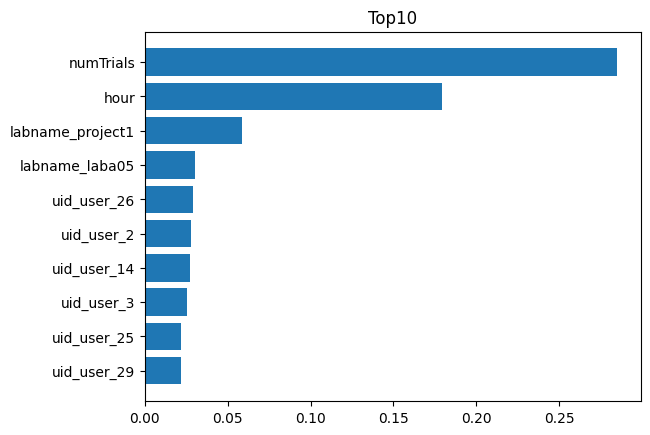

In [32]:
show_barh(top_ind_col,coef)